# Eye of the Emergency

## Libraries and dataset import

In [1]:
import pandas as pd

# Data visualization

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
train_df = pd.read_csv('train_tweets.csv')
test_df = pd.read_csv('test_tweets.csv')

## Data Exploration

### Train Data Exploration

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Peu de colonnes, beaucoup de NaN dans keyword et location.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train_df.text.size

7613

In [7]:
train_df.text.unique().size

7503

7613 tweets dont 7503 uniques

#### Décompte des tweets doublons

In [8]:
unique_count = pd.DataFrame(pd.value_counts(train_df.text))
unique_count = unique_count.reset_index()
unique_count.columns = ['text', 'count']

In [9]:
unique_count.head()

,text,count
0,11-Year-Old Boy Charged With Manslaughter of T...,10
1,He came to a land which was engulfed in tribal...,6
2,The Prophet (peace be upon him) said 'Save you...,6
3,#Bestnaijamade: 16yr old PKK suicide bomber wh...,6
4,Madhya Pradesh Train Derailment: Village Youth...,5


In [10]:
train_df_unique = pd.DataFrame(train_df.text.unique(), columns = ['text'])
train_df_unique.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [11]:
train_df_unique = train_df_unique.merge(unique_count)
train_df_unique.head()

,text,count
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
train_df_count = train_df.merge(unique_count)

In [13]:
train_df_count.shape[0]

7613

In [14]:
train_df_count['count'].sum()

8021

In [15]:
train_df_count.head()

,id,keyword,location,text,target,count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1


#### Vérification si les tweets en doublons sont tous du même target

In [16]:
target_count = [
    int(
        (
        train_df_count[train_df_count.text == train_df_count.iloc[i].text].target.sum() == train_df_count[train_df_count.text == train_df_count.iloc[i].text].shape[0]
        )
        or
        (
        train_df_count[train_df_count.text == train_df_count.iloc[i].text].target.sum() == 0
        )
    )
    
    for i in range(train_df_count.shape[0])
]

In [17]:
sum(target_count)

7558

In [18]:
len(target_count)

7613

Il existe des doublons qui n'ont pas le même target. Faut-il les drop ?

In [19]:
target_count_df = pd.DataFrame(target_count, columns=['target_count'])
train_df_target_count = pd.concat([train_df_count, target_count_df], axis = 1)
train_df_target_count[train_df_target_count.target_count == 0]

,id,keyword,location,text,target,count,target_count
610,881,bioterrorism,NaN,To fight bioterrorism sir.,1,4,0
611,898,bioterrorism,NaN,To fight bioterrorism sir.,0,4,0
612,907,bioterrorism,NaN,To fight bioterrorism sir.,1,4,0
613,916,bioterrorism,NaN,To fight bioterrorism sir.,0,4,0
1198,1723,buildings%20burning,"Mackay, QLD, Australia",Mmmmmm I'm burning.... I'm burning buildings I...,1,2,0
1199,1922,burning%20buildings,"Mackay, QLD, Australia",Mmmmmm I'm burning.... I'm burning buildings I...,0,2,0
1221,1752,buildings%20burning,"Epic City, BB.",I Pledge Allegiance To The P.O.P.E. And The Bu...,0,2,0
1222,1968,burning%20buildings,"Epic City, BB.",I Pledge Allegiance To The P.O.P.E. And The Bu...,1,2,0
1229,1760,buildings%20burning,dallas,like for the music video I want some real acti...,1,2,0
1230,1950,burning%20buildings,dallas,like for the music video I want some real acti...,0,2,0


### Longueur des tweets

In [20]:
lg = pd.DataFrame([len(txt) for txt in train_df.text], columns = ['len_text'])
lg.head()

,len_text
0,69
1,38
2,133
3,65
4,88


In [21]:
train_df_len = pd.concat([train_df_count, lg], axis = 1)
train_df_len.head()

,id,keyword,location,text,target,count,len_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88


In [22]:
round(train_df_len.len_text.mean(), 1)

101.0

In [23]:
round(train_df_len[train_df_len.target == 0].len_text.mean(), 1)

97.6

In [24]:
round(train_df_len[train_df_len.target == 1].len_text.mean(), 1)

105.6

### Test Data Exploration

In [25]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [27]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Data Preprocess

In [28]:
df = train_df_len.copy()

### Location Encoder

In [29]:
encode_location = pd.DataFrame([int(type(ct)==str) for ct in df.location], columns=['location_enc'])

In [30]:
df = pd.concat([df, encode_location], axis=1)
df.head()

,id,keyword,location,text,target,count,len_text,location_enc
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88,0


## Data Visualization

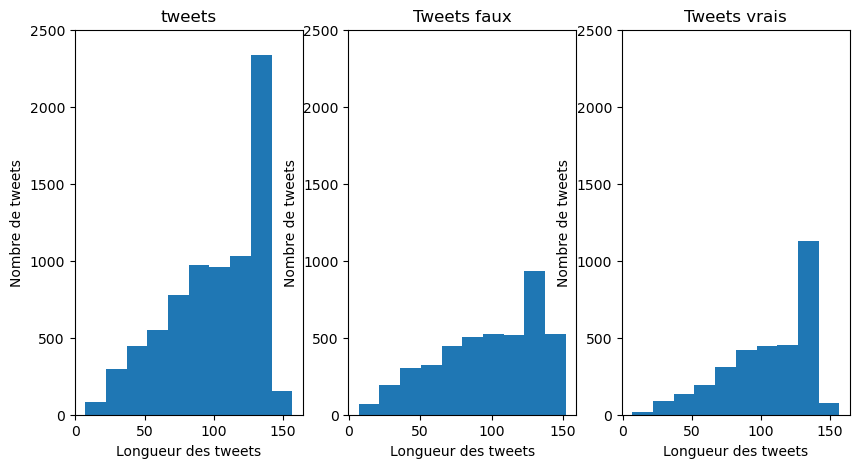

In [31]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)

plt.hist(df.len_text)
plt.title('tweets')
plt.xlabel('Longueur des tweets')
plt.ylabel('Nombre de tweets')
plt.ylim((0,2500))

plt.subplot(1, 3, 2)

plt.hist(df[df.target==0].len_text)
plt.title('Tweets faux')
plt.xlabel('Longueur des tweets')
plt.ylabel('Nombre de tweets')
plt.ylim((0,2500))


plt.subplot(1, 3, 3)

plt.hist(df[df.target==1].len_text)
plt.title('Tweets vrais')
plt.xlabel('Longueur des tweets')
plt.ylabel('Nombre de tweets')
plt.ylim((0,2500))

plt.show()

In [32]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f} %\n({v:d})'.format(p=pct,v=val)
    return my_autopct

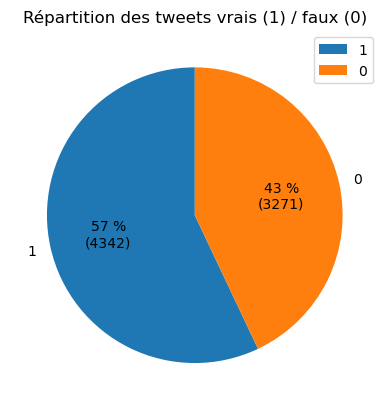

In [33]:
plt.pie(pd.value_counts(df.target), labels = df.target.unique(), autopct=make_autopct(pd.value_counts(df.target)), startangle = 90)

plt.title('Répartition des tweets vrais (1) / faux (0)')
plt.legend()

plt.show()

In [34]:
df_loc_0 = df[df.location_enc == 0]
df_loc_1 = df[df.location_enc == 1]

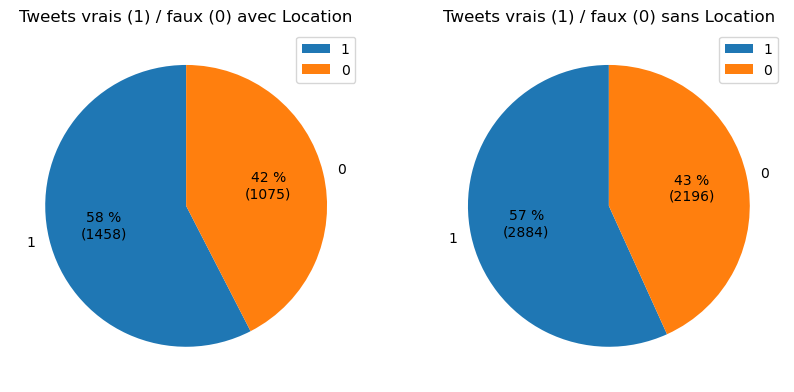

In [35]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.pie(pd.value_counts(df_loc_0.target), labels = df_loc_0.target.unique(), autopct=make_autopct(pd.value_counts(df_loc_0.target)), startangle = 90)

plt.title('Tweets vrais (1) / faux (0) avec Location')
plt.legend()

plt.subplot(1, 2, 2)

plt.pie(pd.value_counts(df_loc_1.target), labels = df_loc_1.target.unique(), autopct=make_autopct(pd.value_counts(df_loc_1.target)), startangle = 90)

plt.title('Tweets vrais (1) / faux (0) sans Location')
plt.legend()

plt.show()

In [36]:
stopwords = pd.read_csv('stopwords.txt', header = None)
stopwords.columns=['words']

In [37]:
stopwords = [wrd for wrd in stopwords.words]

In [38]:
stopwords.append('http')
stopwords.append('https')
stopwords.append('Û_')
stopwords.append('amp')

In [39]:
text = [txt for txt in df.text]
#text

In [40]:
my_lst_str = ' '.join(map(str, text))
#my_lst_str

In [41]:
text_0 = [txt for txt in df.text[df.target == 0]]
text_1 = [txt for txt in df.text[df.target == 1]]

In [42]:
my_lst_str_0 = ' '.join(map(str, text_0))
my_lst_str_1 = ' '.join(map(str, text_1))

In [43]:
#my_lst_str_0
#my_lst_str_1

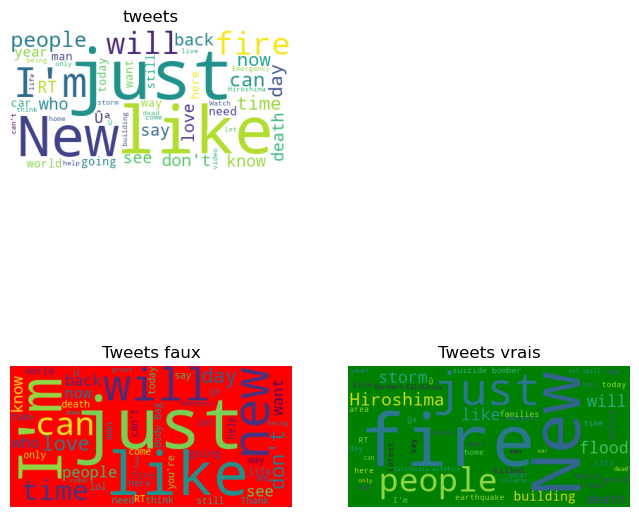

In [44]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords , max_words = 50).generate(my_lst_str)
plt.imshow(wordcloud)

plt.title('tweets')
plt.axis("off")

plt.subplot(2, 2, 3)

wordcloud_0 = WordCloud(background_color = 'red', stopwords = stopwords , max_words = 50).generate(my_lst_str_0)
plt.imshow(wordcloud_0)

plt.title('Tweets faux')
plt.axis("off")


plt.subplot(2, 2, 4)

wordcloud_1 = WordCloud(background_color = 'green', stopwords = stopwords , max_words = 50).generate(my_lst_str_1)
plt.imshow(wordcloud_1)

plt.title('Tweets vrais')
plt.axis("off")

plt.show()